## Create Latitude and Longitude Combinations


In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(41.88594051240386, 84.56832605663931),
 (-25.767311614163475, 7.851395904707545),
 (-2.6700626147270867, 55.82262438446122),
 (-27.442589359977482, 66.84777142710811),
 (19.296081128730805, -85.01817975333135),
 (87.81670421054025, 150.12863526952555),
 (-27.158335842246956, -87.04230772259565),
 (43.179962088836874, -105.81263677398661),
 (-30.134105593445817, 68.3846987775654),
 (-66.94366781940485, 122.51088200775757),
 (59.21420040105909, -104.15168904374389),
 (-30.21265663949196, -116.0882108556254),
 (-56.722718957919874, 73.88998928032032),
 (11.607535973472508, -152.4138516710014),
 (-33.323389400481084, -97.01865843772744),
 (59.10450717131431, -67.85596441423951),
 (68.01822026952374, 168.25900799728004),
 (54.47950602645875, -71.36085675620812),
 (-61.44110152584097, 71.68475963713192),
 (-72.79249018968018, 133.57315072359506),
 (-61.277559890908876, -118.66080506719194),
 (-60.981570176021435, 150.25404627261094),
 (23.685508352075388, 13.97731420864639),
 (51.658543195

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify th enearest city for each atitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

### Get the City Weather Data
1. Import our dependencies and initialize counters and an empty list that will hold the weather data
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a5e27cecc4fcf20d888a30c63791d839


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Instead of using two `for` loops, we can use the `enumerate()` method as an alternative way toiterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the `enumerate()` method is the following:

for i, item in enumerate(list):

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

### Handle API Request Errors with try-except Blocks

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | korla
Processing Record 2 of Set 1 | walvis bay
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | cozumel
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | casper
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | la ronge
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | marzuq
Processing Record 23 

Processing Record 41 of Set 4 | calamar
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | avera
Processing Record 44 of Set 4 | mersing
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | jinchang
Processing Record 47 of Set 4 | broome
Processing Record 48 of Set 4 | jalu
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | nsanje
Processing Record 1 of Set 5 | fort nelson
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | tlahualilo
City not found. Skipping...
Processing Record 5 of Set 5 | sambava
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | tasgaon
Processing Record 8 of Set 5 | kiunga
Processing Record 9 of Set 5 | wukari
Processing Record 10 of Set 5 | inirida
Processing Record 11 of Set 5 | hearst
Processing Record 12 of Set 5 | olhao
Processing Record 13 of Set 5 | poum

Processing Record 33 of Set 8 | bacuit
City not found. Skipping...
Processing Record 34 of Set 8 | pisco
Processing Record 35 of Set 8 | esik
Processing Record 36 of Set 8 | hays
Processing Record 37 of Set 8 | bagan
Processing Record 38 of Set 8 | kirkenes
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | isla vista
Processing Record 41 of Set 8 | launceston
Processing Record 42 of Set 8 | nizwa
Processing Record 43 of Set 8 | rognan
Processing Record 44 of Set 8 | wilmington
Processing Record 45 of Set 8 | xico
Processing Record 46 of Set 8 | funtua
Processing Record 47 of Set 8 | nyurba
Processing Record 48 of Set 8 | bargal
City not found. Skipping...
Processing Record 49 of Set 8 | trincomalee
Processing Record 50 of Set 8 | burnie
Processing Record 1 of Set 9 | usogorsk
Processing Record 2 of Set 9 | da lat
Processing Record 3 of Set 9 | bambari
Processing Record 4 of Set 9 | prado
Processing Record 5 of Set 9 | novita
Processing Record 6 of Set 9 | grand ri

City not found. Skipping...
Processing Record 25 of Set 12 | kaiyuan
Processing Record 26 of Set 12 | male
Processing Record 27 of Set 12 | port macquarie
Processing Record 28 of Set 12 | yelizovo
Processing Record 29 of Set 12 | xai-xai
Processing Record 30 of Set 12 | velikiy ustyug
Processing Record 31 of Set 12 | saint-ambroise
Processing Record 32 of Set 12 | katherine
Processing Record 33 of Set 12 | omboue
Processing Record 34 of Set 12 | warqla
City not found. Skipping...
Processing Record 35 of Set 12 | flin flon
Processing Record 36 of Set 12 | yendi
Processing Record 37 of Set 12 | dzhebariki-khaya
Processing Record 38 of Set 12 | san patricio
Processing Record 39 of Set 12 | utena
Processing Record 40 of Set 12 | rungata
City not found. Skipping...
Processing Record 41 of Set 12 | matamoros
Processing Record 42 of Set 12 | svetlaya
Processing Record 43 of Set 12 | qandala
Processing Record 44 of Set 12 | priyutnoye
Processing Record 45 of Set 12 | bilma
Processing Record 46

In [12]:
len(city_data)

583

### Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Korla,41.7597,86.1469,49.32,29,0,15.17,CN,2021-04-04 19:42:30
1,Walvis Bay,-22.9575,14.5053,76.37,50,5,10.78,NA,2021-04-04 19:43:07
2,Victoria,22.2855,114.1577,72.00,91,100,1.99,HK,2021-04-04 19:41:15
3,Bambous Virieux,-20.3428,57.7575,81.00,76,38,7.00,MU,2021-04-04 19:41:13
4,Cozumel,20.5083,-86.9458,82.40,47,20,20.71,MX,2021-04-04 19:40:24
5,Chokurdakh,70.6333,147.9167,-29.69,100,49,4.63,RU,2021-04-04 19:41:16
6,Coquimbo,-29.9533,-71.3436,66.20,63,75,8.05,CL,2021-04-04 19:41:32
7,Casper,42.8666,-106.3131,72.00,14,1,6.91,US,2021-04-04 19:43:07
8,Mahebourg,-20.4081,57.7000,81.00,75,27,7.00,MU,2021-04-04 19:39:00
9,Albany,42.6001,-73.9662,59.00,25,36,9.51,US,2021-04-04 19:38:52


In [15]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                   'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2021-04-04 19:42:30,41.7597,86.1469,49.32,29,0,15.17
1,Walvis Bay,NA,2021-04-04 19:43:07,-22.9575,14.5053,76.37,50,5,10.78
2,Victoria,HK,2021-04-04 19:41:15,22.2855,114.1577,72.00,91,100,1.99
3,Bambous Virieux,MU,2021-04-04 19:41:13,-20.3428,57.7575,81.00,76,38,7.00
4,Cozumel,MX,2021-04-04 19:40:24,20.5083,-86.9458,82.40,47,20,20.71
...,...,...,...,...,...,...,...,...,...
578,Erzin,TR,2021-04-04 19:44:50,36.9559,36.2000,61.00,79,7,2.17
579,Irbil,IQ,2021-04-04 19:44:50,36.1926,44.0106,51.80,54,0,1.14
580,Jaguey Grande,CU,2021-04-04 19:44:51,22.5269,-81.1286,80.60,34,40,16.11
581,Litovko,RU,2021-04-04 19:44:51,49.2361,135.1742,31.17,71,80,1.88


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Latitude vs. Temperature

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

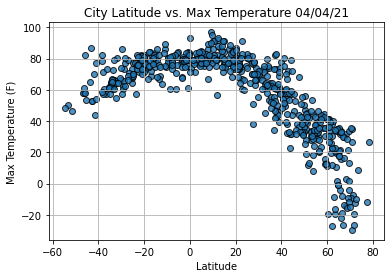

In [23]:
# Import the time module.
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')
# Incorporate the order graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Weather_data/Fig1.png')

# Show plot.
plt.show()

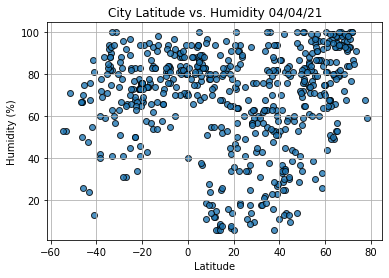

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness


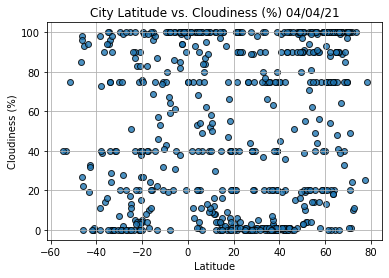

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor='k', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

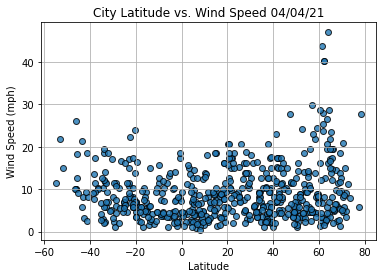

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Use Linear Regression to Find the Relationship Between Variables

Linear regression - used to find a relationship between a dependent variable and one or more idependent variables. Find DV that depends on IV and plot that relationship.

Independent variable - the variable changed by the analyst to observe how it affects the dependent variable.

Dependent variable - the variable tested by the analyst to observe how it is affected by the independent variable

Plot a linear regression line predicting a average y-value, or dependent variable, for a given x-value, or independent variable. This line can be plotted using the equation y=mx + b, where 'm' is the slope of the line and 'b' is the y-intercept. 

To determine how strong the relationship is bewteen the fitted line and the data, we find the correlation coefficient, or r-value, which varies from -1 to 1. A correlation coefficient close to zero is no correlation.

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [28]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)
print(f'The p-value is: {p_value:.3f}')

y = -0.45x + 92.94
The p-value is: 0.011


Data scientists like to use a signigicance level of 0.05:
- a linear regression with a p-value > 0.05 is not statistically significant
- a lin. regression with a p-value < 0.05 is statistically significant

P-value can also be used to justify rejecting a null hypothesis.

In [34]:
# Calculate the regression line 'y values' from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]
regress_values

[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

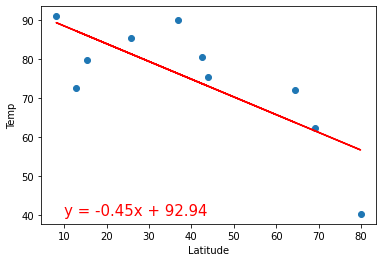

In [35]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,'r')
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

### Find the Correlation Between Latitude and Maximum Temperature


Create a function to create perform linear regression on the weather data
and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [65]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = 'y =  ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames
the `loc` method on the current DataFrame. The `loc` method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is

`row = df.loc[row_index]`.

In [44]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2021-04-04 19:41:24
Lat                       19.7297
Lng                       -155.09
Max Temp                       77
Humidity                       65
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [47]:
# We want Northern Hemisphere latitudes, for latitudes greater than or equal to 0.
city_data_df['Lat'] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
578     True
579     True
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [46]:
city_data_df.loc[(city_data_df['Lat'] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2021-04-04 19:42:30,41.7597,86.1469,49.32,29,0,15.17
2,Victoria,HK,2021-04-04 19:41:15,22.2855,114.1577,72.00,91,100,1.99
4,Cozumel,MX,2021-04-04 19:40:24,20.5083,-86.9458,82.40,47,20,20.71
5,Chokurdakh,RU,2021-04-04 19:41:16,70.6333,147.9167,-29.69,100,49,4.63
7,Casper,US,2021-04-04 19:43:07,42.8666,-106.3131,72.00,14,1,6.91
...,...,...,...,...,...,...,...,...,...
578,Erzin,TR,2021-04-04 19:44:50,36.9559,36.2000,61.00,79,7,2.17
579,Irbil,IQ,2021-04-04 19:44:50,36.1926,44.0106,51.80,54,0,1.14
580,Jaguey Grande,CU,2021-04-04 19:44:51,22.5269,-81.1286,80.60,34,40,16.11
581,Litovko,RU,2021-04-04 19:44:51,49.2361,135.1742,31.17,71,80,1.88


In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2021-04-04 19:42:30,41.7597,86.1469,49.32,29,0,15.17
2,Victoria,HK,2021-04-04 19:41:15,22.2855,114.1577,72.00,91,100,1.99
4,Cozumel,MX,2021-04-04 19:40:24,20.5083,-86.9458,82.40,47,20,20.71
5,Chokurdakh,RU,2021-04-04 19:41:16,70.6333,147.9167,-29.69,100,49,4.63
7,Casper,US,2021-04-04 19:43:07,42.8666,-106.3131,72.00,14,1,6.91


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere


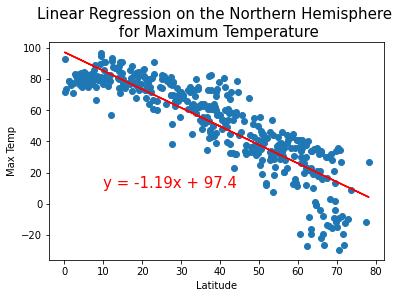

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function.
plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature', fontsize=15)
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 
                       'Max Temp', 
                       (10,10))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

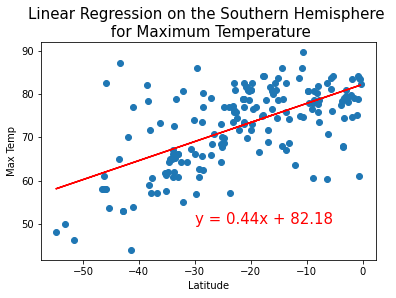

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature', fontsize=15)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,50))

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

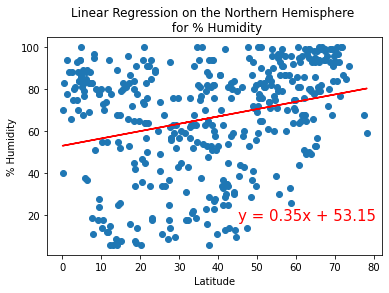

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,18))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

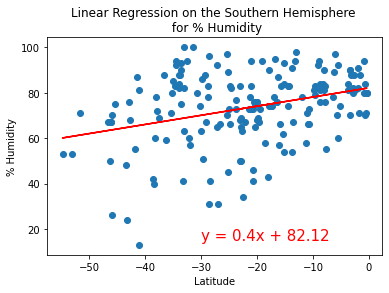

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity')
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-30,15))

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

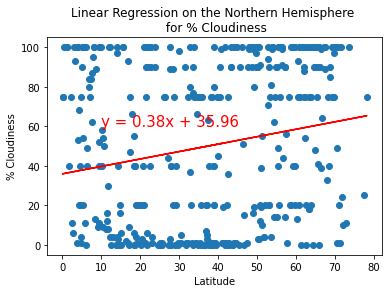

In [93]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(10,60))

Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

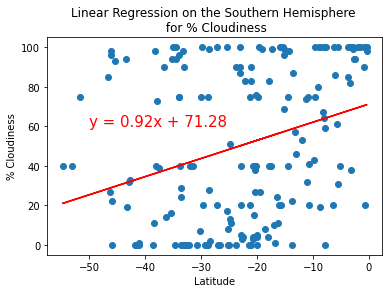

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness')
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

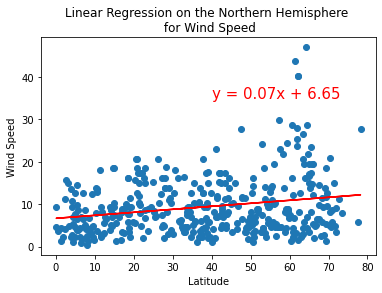

In [99]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed')
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed', (40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

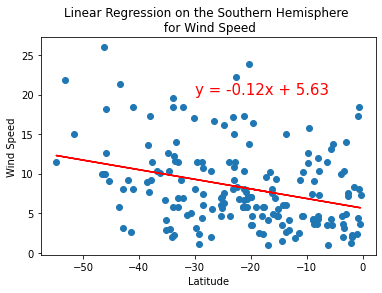

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed')
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed', (-30,20))